Loading data

In [11]:
import pandas as pd
import sys  
sys.path.insert(0, '/home/dibora/User-Analytics-in-the-Telecommunication-Industry/scripts')
import clean_data
import utilities
import norm_scaling

In [3]:
#loading file function
def load_csv(path):
    df = pd.read_csv(path,engine='python',error_bad_lines=False, na_values=['?', None,'-','--','undefined'])
    return df

In [4]:
#loaded file
df= load_csv('../data/data.csv')

/home/dibora/User-Analytics-in-the-Telecommunication-Industry/venv_usr_analytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [6]:
cleaned_data = clean_data.Handle_missing_values(df)
cleaned_data.isnull().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


after loading and cleaning the data now we will do our eda on User engagement, to understand how well the users engage on the available applications. We need to determine the level of engagement of a random user for any application. To do that we will focus on the following "sessions frequency", "the duration of the session" and "the sessions total traffic (download and upload (bytes))". We will do analysis on these variables, normalize them and then cluster users using these metrics, so it will be easier to provide a more customized service for each user.


First step is Doing EDA on the variables

In [76]:
# print out unique session counts per person
# unique_sessions = {"unique_session_counts":cleaned_data.groupby("MSISDN/Number").nunique(), "Out of": cleaned_data["Bearer Id"].count()}

# groups users based on their MSIDN number and count how many sessions they created
cleaned_copy = cleaned_data.copy()
cleaned_copy.drop_duplicates()
df_user = cleaned_copy.groupby("MSISDN/Number")
# print(unique_sessions)

df_session_freq = pd.DataFrame(df_user["Bearer Id"].count())
df_session_dur = pd.DataFrame(df_user["Dur. (ms)"].sum())
df_session_UL = pd.DataFrame(df_user["Total UL (Bytes)"].sum())
df_session_DL = pd.DataFrame(df_user["Total DL (Bytes)"].sum())
df_session_DL.drop_duplicates()
df_session_UL.drop_duplicates
print("Top 10 users with high session frequency")
df_session_freq.sort_values(by=["Bearer Id"], ascending=False).head(10)


Top 10 users with high session frequency


,Bearer Id
MSISDN/Number,
"33,626,320,676.00",18
"33,625,779,332.00",17
"33,614,892,860.00",17
"33,659,725,664.00",16
"33,675,877,202.00",15
"33,760,536,639.00",15
"33,667,163,239.00",13
"33,760,413,819.00",12
"33,604,515,716.00",12


In [8]:
# duration of sessions per user
print("Top 10 users with high session duration")
df_session_dur.sort_values(by="Dur. (ms)",ascending=False).head(10)

Top 10 users with high session duration


,Dur. (ms)
MSISDN/Number,
"33,625,779,332.00","18,553,754.00"
"33,614,892,860.00","9,966,898.00"
"33,760,536,639.00","9,279,434.00"
"33,626,320,676.00","8,791,927.00"
"33,667,163,239.00","8,744,914.00"
"33,662,840,755.00","6,614,270.00"
"33,664,693,736.00","6,288,730.00"
"33,603,127,838.00","6,287,761.00"
"33,667,456,716.00","5,649,882.00"


In [9]:
# total data DL volume per user
print("Top 10 users with high data DL volume")
df_session_DL.sort_values(by="Total DL (Bytes)",ascending=False).head(10)

Top 10 users with high data DL volume


,Total DL (Bytes)
MSISDN/Number,
"33,614,892,860.00","8,156,743,493.00"
"33,760,536,639.00","7,811,295,382.00"
"33,625,779,332.00","7,770,043,342.00"
"33,675,877,202.00","7,309,541,816.00"
"33,626,320,676.00","7,301,516,540.00"
"33,659,725,664.00","7,081,602,462.00"
"33,666,464,084.00","6,903,439,962.00"
"33,760,413,819.00","6,610,851,624.00"
"33,664,712,899.00","6,400,773,755.00"


In [10]:
# total UL data volume per user
print("Top 10 users with high data UL volume")
df_session_UL.sort_values(by="Total UL (Bytes)",ascending=False).head(10)

Top 10 users with high data UL volume


,Total UL (Bytes)
MSISDN/Number,
"33,625,779,332.00","729,577,380.00"
"33,760,536,639.00","703,478,581.00"
"33,614,892,860.00","689,483,001.00"
"33,626,320,676.00","669,650,721.00"
"33,659,725,664.00","624,260,321.00"
"33,675,877,202.00","581,568,792.00"
"33,667,163,239.00","566,326,364.00"
"33,698,792,269.00","530,343,105.00"
"33,760,413,819.00","521,518,890.00"


In [73]:
# user engagment metrics per user
df_user_engagement = pd.DataFrame({"session_freq": df_session_freq["Bearer Id"],"session_duration":df_session_dur["Dur. (ms)"],"session_data_DL": df_session_DL["Total DL (Bytes)"],"session_data_UL": df_session_UL["Total UL (Bytes)"]})
df_user_engagment.head(10)

,session_freq,session_duration,session_data_DL,session_data_UL
MSISDN/Number,,,,
"33,601,001,722.00",1,"116,720.00","842,637,466.00","36,053,108.00"
"33,601,001,754.00",1,"181,230.00","120,755,184.00","36,104,459.00"
"33,601,002,511.00",1,"134,969.00","556,659,663.00","39,306,820.00"
"33,601,007,832.00",1,"49,878.00","401,993,172.00","20,327,526.00"
"33,601,008,617.00",2,"37,104.00","1,363,130,417.00","94,280,527.00"
"33,601,010,682.00",2,"253,983.00","555,207,972.00","60,009,249.00"
"33,601,011,634.00",2,"128,360.00","553,041,208.00","101,681,858.00"
"33,601,011,959.00",1,"86,399.00","294,085,078.00","38,575,279.00"
"33,601,014,694.00",2,"495,702.00","896,560,173.00","93,572,016.00"


Now we have got some intuition about our data regarding user engagement lets normalize and cluster them.


In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [16]:
normalized_data_freq = norm_scaling.normalize(df_session_freq)
normalized_data_dur = norm_scaling.normalize(df_session_dur)
normalized_data_UL = norm_scaling.normalize(df_session_DL)
normalized_data_DL = norm_scaling.normalize(df_session_UL)
X = np.hstack((normalized_data_freq,normalized_data_dur,normalized_data_DL,normalized_data_UL))
X = norm_scaling.normalize(X)


In [24]:
plt.scatter(X[ : , 0], X[ :, 1],X[ :, 2],X[ :, 3], s = [50,50], c = 'b')
plt.show()

TypeError: scatter() got multiple values for argument 's'

We first split our dataset into training and test set then run a k-means (k=3) to classify customers in three groups of engagement.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [68]:
# X is nsamples x mfeatures
# X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 8)
kmeans = KMeans(n_clusters=3).fit_predict(X)
X.shape

(106856, 4)

In [69]:
# y_pred = kmeans.predict(X_test)
# y_pred.shape,y_pred[:5]
kmeans.shape,X[:,]

((106856,),
 array([[0.05555556, 0.00590825, 0.04566635, 0.10233418],
        [0.05555556, 0.00938651, 0.04573701, 0.01373702],
        [0.05555556, 0.0068922 , 0.05014367, 0.06723591],
        ...,
        [0.05555556, 0.04692194, 0.04737653, 0.02282804],
        [0.05555556, 0.01325784, 0.07401289, 0.06514646],
        [0.05555556, 0.04651534, 0.07924635, 0.00857526]]))

Find the min,max and average of each metrics for each cluster

In [74]:
# organizing datapoints per cluster
un_normalized_data = df_user_engagement.to_numpy()
clusters = {}
cluster_no = 3
container = []
for i in range(0,cluster_no):
    for x,y in zip(un_normalized_data,kmeans):    
        if y == i:
            container.append(x)
    clusters["cluster_"+str(i)] = np.array(container)
    container = []


In [75]:
# printing information for each cluster
metrics = 4
metrics_name = ["Session_freq","session_dur","total_dl","total_ul"]
for i in range(3):
    for metric in range(0,metrics):
        data_cluster = clusters["cluster_"+str(i)][:,metric]
        print("min of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.min())
        print("max of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.max())
        print("avg of cluster "+str(i)+ ", "+metrics_name[metric],data_cluster.mean())

min of cluster 0, Session_freq 0.0
max of cluster 0, Session_freq 2.0
avg of cluster 0, Session_freq 1.0182441856082023
min of cluster 0, session_dur 7142.0
max of cluster 0, session_dur 1573420.0
avg of cluster 0, session_dur 105383.47838214783
min of cluster 0, total_dl 8827082.0
max of cluster 0, total_dl 1086105000.0
avg of cluster 0, total_dl 453905748.78519106
min of cluster 0, total_ul 2866892.0
max of cluster 0, total_ul 108187386.0
avg of cluster 0, total_ul 41755118.31441064
min of cluster 1, Session_freq 3.0
max of cluster 1, Session_freq 18.0
avg of cluster 1, Session_freq 4.254475084663764
min of cluster 1, session_dur 46896.0
max of cluster 1, session_dur 18553754.0
avg of cluster 1, session_dur 568377.7300435414
min of cluster 1, total_dl 525493344.0
max of cluster 1, total_dl 8156743493.0
avg of cluster 1, total_dl 2065808382.3086598
min of cluster 1, total_ul 78022976.0
max of cluster 1, total_ul 729577380.0
avg of cluster 1, total_ul 177658855.42597967
min of cluster 

In [92]:
# df_user_copy = df_user_engagement.copy()
# df_user_copy['cluster'] = pd.DataFrame(kmeans)
# # sn.scatterplot(data=df_user_copy,hue="cluster",style="cluster")
# sn.catplot(data=df_user_copy, x="cluster",y="session_freq",kind="bar")
# # Y_df

In [ ]:
#Aggregate user total traffic per application and derive the top 10 most engaged users per application



In [141]:
#using the elbow method to find the optimal K
from scipy.spatial.distance import cdist
distortions = []
inertias = []
K = range(1, 10)
mapping1 = {}
mapping2 = {}
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [142]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.0022450435241785044
2 : 0.002214616432262447
3 : 0.0017664450534807077
4 : 0.0016353036961872876
5 : 0.0015802575843101782
6 : 0.0013977447530242244
7 : 0.001363167360812234
8 : 0.0012257662225384123
9 : 0.0011420006516443075


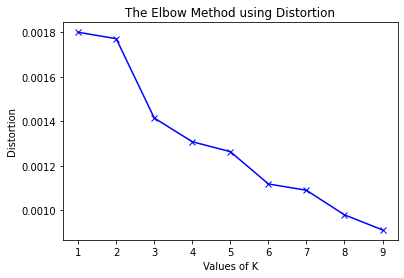

In [143]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [133]:
# k = 5
kmeanModel = KMeans(n_clusters=5).fit(X_train)
kmeanModel.fit(X_test)

KMeans(n_clusters=5)

In [136]:
kmeanModel.cluster_centers_

array([[0.00088937, 0.00048604],
       [0.00236501, 0.00293069],
       [0.00086311, 0.00135859],
       [0.00436399, 0.00475034],
       [0.0019052 , 0.00165641]])

In [ ]:
# Compute the minimum, maximum, average & total non- normalized metrics for each cluster.


Now we aggregate application data for each user


In [55]:
app_names = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
dict_app_UL = {app_name: df_user[app_name+" UL (Bytes)"].sum().sort_values(ascending=False) for app_name in app_names}
dict_app_DL = {app_name: df_user[app_name+" DL (Bytes)"].sum().sort_values(ascending=False) for app_name in app_names}
print("printing top 10 users based on Social Media UL")
print(dict_app_UL["Social Media"].head(10))
print("\n")
print("printing top 10 users based on Social Media DL")
print(dict_app_DL["Social Media"].head(10))

printing top 10 users based on Social Media UL
MSISDN/Number
3.366371e+10    3.615635e+07
3.362632e+10    6.309420e+05
3.362578e+10    5.713790e+05
3.367588e+10    5.675570e+05
3.361489e+10    5.448000e+05
3.365973e+10    5.119140e+05
3.366716e+10    4.940970e+05
3.376054e+10    4.855430e+05
3.365836e+10    4.201460e+05
3.365936e+10    4.095640e+05
Name: Social Media UL (Bytes), dtype: float64


printing top 10 users based on Social Media DL
MSISDN/Number
3.366371e+10    1.938043e+09
3.362632e+10    4.274384e+07
3.376054e+10    3.929765e+07
3.365973e+10    3.490044e+07
3.361489e+10    2.774974e+07
3.362578e+10    2.656412e+07
3.366716e+10    2.375375e+07
3.378632e+10    2.356866e+07
3.366907e+10    2.347705e+07
3.360313e+10    2.277668e+07
Name: Social Media DL (Bytes), dtype: float64


In [56]:
print("printing top 10 users based on Google UL")
print(dict_app_UL["Google"].head(10))
print("\n")
print("printing top 10 users based on Google DL")
print(dict_app_DL["Google"].head(10))

printing top 10 users based on Google UL
MSISDN/Number
3.366371e+10    2.241409e+09
3.362632e+10    3.608540e+07
3.376054e+10    3.459657e+07
3.362578e+10    3.440318e+07
3.361489e+10    3.403208e+07
3.366716e+10    3.332487e+07
3.378632e+10    3.143467e+07
3.367588e+10    2.685751e+07
3.366646e+10    2.672152e+07
3.376041e+10    2.640687e+07
Name: Google UL (Bytes), dtype: float64


printing top 10 users based on Google DL
MSISDN/Number
3.366371e+10    6.009292e+09
3.362632e+10    1.161065e+08
3.362578e+10    1.079047e+08
3.361489e+10    9.394171e+07
3.365973e+10    9.095855e+07
3.376054e+10    8.862653e+07
3.367588e+10    8.300299e+07
3.378632e+10    7.881981e+07
3.360313e+10    7.394206e+07
3.376127e+10    7.294980e+07
Name: Google DL (Bytes), dtype: float64


In [57]:
print("printing top 10 users based on Youtube UL")
print(dict_app_UL["Youtube"].head(10))
print("\n")
print("printing top 10 users based on Youtube DL")
print(dict_app_DL["Youtube"].head(10))

printing top 10 users based on Youtube UL
MSISDN/Number
3.366371e+10    1.185341e+10
3.362578e+10    2.150757e+08
3.362632e+10    2.104343e+08
3.376054e+10    2.022209e+08
3.361489e+10    1.945468e+08
3.366716e+10    1.732586e+08
3.367588e+10    1.587453e+08
3.365826e+10    1.565403e+08
3.376127e+10    1.537331e+08
3.363004e+10    1.492479e+08
Name: Youtube UL (Bytes), dtype: float64


printing top 10 users based on Youtube DL
MSISDN/Number
3.366371e+10    1.249731e+10
3.362578e+10    2.378830e+08
3.361489e+10    1.998234e+08
3.376054e+10    1.940683e+08
3.362708e+10    1.873233e+08
3.376041e+10    1.742460e+08
3.369879e+10    1.669003e+08
3.362632e+10    1.640487e+08
3.360313e+10    1.589767e+08
3.367588e+10    1.586652e+08
Name: Youtube DL (Bytes), dtype: float64


In [58]:
print("printing top 10 users based on Email UL")
print(dict_app_UL["Email"].head(10))
print("\n")
print("printing top 10 users based on Email DL")
print(dict_app_DL["Email"].head(10))

printing top 10 users based on Email UL
MSISDN/Number
3.366371e+10    4.966873e+08
3.362632e+10    9.013997e+06
3.362578e+10    8.738554e+06
3.376054e+10    7.255872e+06
3.367588e+10    7.229698e+06
3.361489e+10    7.181423e+06
3.366716e+10    7.059044e+06
3.365982e+10    6.937942e+06
3.362708e+10    6.213264e+06
3.366471e+10    6.212447e+06
Name: Email UL (Bytes), dtype: float64


printing top 10 users based on Email DL
MSISDN/Number
3.366371e+10    1.906935e+09
3.361489e+10    3.360721e+07
3.362632e+10    3.340478e+07
3.362578e+10    3.189541e+07
3.378632e+10    3.087691e+07
3.365973e+10    2.990765e+07
3.376054e+10    2.643790e+07
3.366546e+10    2.594287e+07
3.367588e+10    2.428472e+07
3.369879e+10    2.416560e+07
Name: Email DL (Bytes), dtype: float64


In [59]:
print("printing top 10 users based on Netflix UL")
print(dict_app_UL["Netflix"].head(10))
print("\n")
print("printing top 10 users based on Netflix DL")
print(dict_app_DL["Netflix"].head(10))

printing top 10 users based on Netflix UL
MSISDN/Number
3.366371e+10    1.198034e+10
3.365973e+10    2.032419e+08
3.376054e+10    1.881424e+08
3.361489e+10    1.818151e+08
3.369879e+10    1.652202e+08
3.362578e+10    1.630684e+08
3.376041e+10    1.513237e+08
3.376233e+10    1.500268e+08
3.367588e+10    1.474667e+08
3.369876e+10    1.472298e+08
Name: Netflix UL (Bytes), dtype: float64


printing top 10 users based on Netflix DL
MSISDN/Number
3.366371e+10    1.230177e+10
3.362632e+10    1.994792e+08
3.365973e+10    1.962772e+08
3.362578e+10    1.939122e+08
3.361489e+10    1.795860e+08
3.366716e+10    1.679324e+08
3.376127e+10    1.672611e+08
3.376041e+10    1.670238e+08
3.378632e+10    1.636027e+08
3.367588e+10    1.616265e+08
Name: Netflix DL (Bytes), dtype: float64


In [60]:
print("printing top 10 users based on Gaming UL")
print(dict_app_UL["Gaming"].head(10))
print("\n")
print("printing top 10 users based on Gaming DL")
print(dict_app_DL["Gaming"].head(10))

printing top 10 users based on Gaming UL
MSISDN/Number
3.366371e+10    8.743856e+09
3.362578e+10    1.547897e+08
3.376054e+10    1.446811e+08
3.362632e+10    1.418386e+08
3.361489e+10    1.273968e+08
3.365973e+10    1.156587e+08
3.369879e+10    1.126150e+08
3.378632e+10    1.101923e+08
3.376127e+10    1.086893e+08
3.367588e+10    1.072606e+08
Name: Gaming UL (Bytes), dtype: float64


printing top 10 users based on Gaming DL
MSISDN/Number
3.366371e+10    4.528908e+11
3.361489e+10    7.622035e+09
3.376054e+10    7.316364e+09
3.362578e+10    7.171884e+09
3.367588e+10    6.863307e+09
3.362632e+10    6.745734e+09
3.365973e+10    6.609900e+09
3.366646e+10    6.546328e+09
3.376041e+10    6.170943e+09
3.366471e+10    6.013562e+09
Name: Gaming DL (Bytes), dtype: float64


In [61]:
print("printing top 10 users based on Other UL")
print(dict_app_UL["Other"].head(10))
print("\n")
print("printing top 10 users based on Other DL")
print(dict_app_DL["Other"].head(10))

printing top 10 users based on Other UL
MSISDN/Number
3.366371e+10    9.066371e+09
3.362578e+10    1.529305e+08
3.361489e+10    1.439660e+08
3.362632e+10    1.424009e+08
3.365973e+10    1.348649e+08
3.367588e+10    1.334414e+08
3.376054e+10    1.260962e+08
3.376041e+10    1.131414e+08
3.366471e+10    1.083234e+08
3.365836e+10    1.078713e+08
Name: Other UL (Bytes), dtype: float64


printing top 10 users based on Other DL
MSISDN/Number
3.366371e+10    4.425858e+11
3.362632e+10    8.025477e+09
3.361489e+10    7.495298e+09
3.367588e+10    6.665074e+09
3.360313e+10    6.222705e+09
3.362578e+10    6.201653e+09
3.365973e+10    6.182551e+09
3.362695e+10    5.228772e+09
3.362708e+10    5.039747e+09
3.376127e+10    4.997985e+09
Name: Other DL (Bytes), dtype: float64


In [ ]:
# top 3 most used applications
